In [2]:
import numpy as np
from scipy import integrate
from utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Homework1 PETE 4241 - Vovle field

####   1. For the well 15_9-F-14 in the Volve field
---

In [3]:
#Unit Converter and basic paramters
ft=0.3048 #m
g_cm3=1000 #kg/m3
g=9.8 #m/s2
rho_w=1.02*g_cm3 #kg/m3
meter=1

#Load and prepare the data
data = np.loadtxt("WLC_PETRO_COMPUTED_INPUT_1.DLIS.0.las", skiprows=48)
DZ,rho=data[:,0]*meter,data[:,1]*g_cm3

#clean data where negative density
DZ=DZ[np.where(rho>0)]
rho=rho[np.where(rho>0)]

print('Investigated Depth',[min(DZ),max(DZ)])

#Supply some data above the first depth
rho_avg=1.75*g_cm3
z0=DZ[0]

DZ=np.insert(DZ,0,[0,z0-1e-6])
rho=np.insert(rho,0,[rho_avg,rho_avg])



Investigated Depth [2777.9472, 3738.6768]


> ##### (a) Vertical stress in MPa  
The vertical stress can be calculated in onshore and offshore as follows:  

In [4]:
#Volve Shale
Sv=integrate.cumtrapz(rho*g, DZ)

showTables(X=[DZ[1:]/1e3],Y=[Sv/1e6],
           XLables=['Depth(km)'],
           YLabels=['Vertical Stress(MPa)'])

,Depth(km),Vertical Stress(MPa)
0,2.777947,47.641794
1,2.873959,50.005211
2,2.970124,52.453629
3,3.066288,54.710798
4,3.162452,56.802317
5,3.258617,58.978301
6,3.354781,61.114823
7,3.450946,63.226384
8,3.547110,65.376154
9,3.643274,67.538006


> ##### (b) Hydrostatic pressure in MPa.  
The pore pressure can be calculated as follows:  
$${{S}_{v}}={{\bar{\rho }}_{w}}g{z} $$

In [5]:
p_pore=rho_w*g*DZ

showTables(X=[DZ[1:]/1e3],Y=[p_pore[1:]/1e6],
           XLables=['Depth(km)'],
           YLabels=['PorePressure(MPa)'])

,Depth(km),PorePressure(MPa)
0,2.777947,27.768360
1,2.873959,28.728096
2,2.970124,29.689356
3,3.066288,30.650615
4,3.162452,31.611874
5,3.258617,32.573134
6,3.354781,33.534393
7,3.450946,34.495652
8,3.547110,35.456912
9,3.643274,36.418171


> ##### (c) Gradient of vertical stress in MPa/km.  

In [6]:
Sv_grad=Sv/DZ[1:]

showTables(X=[DZ[1:]/1e3],Y=[Sv_grad/1e3],
           XLables=['Depth(km)'],
           YLabels=['Sv_grad(MPa/km)'])

,Depth(km),Sv_grad(MPa/km)
0,2.777947,17.150000
1,2.873959,17.399416
2,2.970124,17.660420
3,3.066288,17.842681
4,3.162452,17.961477
5,3.258617,18.099183
6,3.354781,18.217231
7,3.450946,18.321466
8,3.547110,18.430822
9,3.643274,18.537721


> ##### (d) Porosity.  
The porosity can be easily calculated from the bulk density as follows:
$$\phi =\frac{{\rho }_{m}-{\rho }_{b}}{{\rho }_{m}-{\rho }_{f}}$$

In [7]:
rho_m=2.6878*g_cm3

phi=(rho_m-rho)/(rho_m-rho_w)
showTables(X=[DZ[1:]/1e3],Y=[phi[1:]],
           XLables=['Depth(km)'],
           YLabels=['Porosity(-)'])

,Depth(km),Porosity(-)
0,2.777947,0.562298
1,2.873959,0.063197
2,2.970124,0.056781
3,3.066288,0.145821
4,3.162452,0.308850
5,3.258617,0.266459
6,3.354781,0.289363
7,3.450946,0.268977
8,3.547110,0.271495
9,3.643274,0.243255


#### 2.Create the following plots for the Barnett and GOM wells (with the x-axis above and have depth increase downwards on the y-axis)
---

> ##### (a) Depth vs density

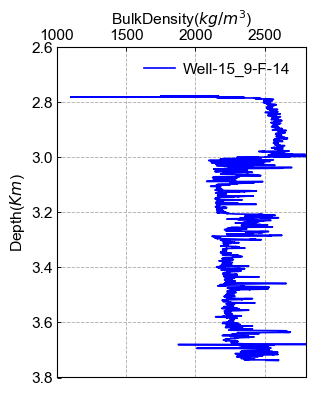

In [8]:
plotTables(X=[rho[1:]],Y=[DZ[1:]/1e3],
           XLable='BulkDensity($kg/m^3$)',YLabel='Depth($Km$)',DataNames=['Well-15_9-F-14'],
           Xlim=[1000,2800],Ylim=[2.6,3.8],
           InvertY=True,img_fname='img.png')

>  ##### (b) depth versus `vertical stress` and `hydrostatic pressure`

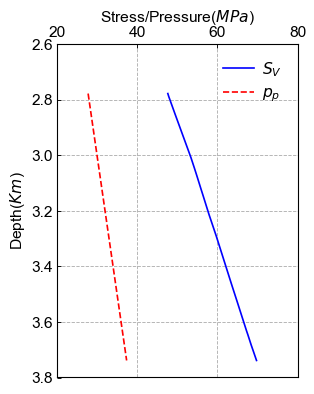

In [9]:
plotTables(Y=[DZ[1:]/1e3,DZ[1:]/1e3],X=[Sv/1e6,p_pore[1:]/1e6],
           XLable='Stress/Pressure($MPa$)',YLabel='Depth($Km$)',
           DataNames=['$S_V$','$p_p$'],
           Xlim=[20,80],Ylim=[2.6,3.8],
           InvertY=True,img_fname='img.png')

>  ##### (c) depth versus gradient of verticl stress in MPa/km

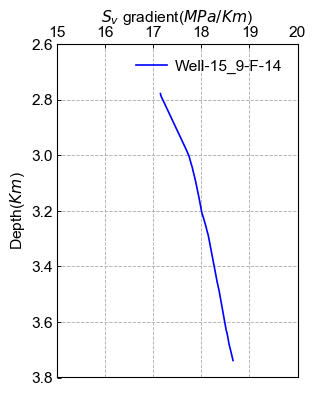

In [15]:
plotTables(Y=[DZ[1:]/1e3],X=[Sv_grad/1e3],
           XLable='$S_v$ gradient($MPa/Km$)',YLabel='Depth($Km$)',DataNames=['Well-15_9-F-14'],
           Ylim=[2.6,3.8],Xlim=[15,20],
           InvertY=True,img_fname='img.png')

>  ##### (d) depth versus porosity

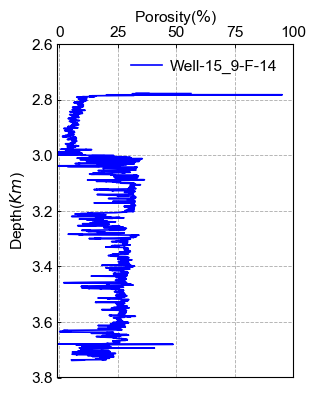

In [11]:
plotTables(Y=[DZ[1:]/1e3],X=[phi[1:]*100],
           XLable='Porosity($\%$)',YLabel='Depth($Km$)',DataNames=['Well-15_9-F-14'],
           Ylim=[2.6,3.8],Xlim=[-1,100],
           InvertY=True,img_fname='img.png')

#### 3 (i). Divide the density profile in 2(a) into 5 blocks using the variations in the bulk density values
---

> Based on the smoothed density log by moving average, the block can be expressed as follows:  

,Block(km)
0,"(2.78, 3.0)"
1,"(3.0, 3.2)"
2,"(3.2, 3.3)"
3,"(3.3, 3.46)"
4,"(3.46, 3.49)"
5,"(3.49, 3.64)"
6,"(3.64, 3.7)"
7,"(3.7, 3.74)"


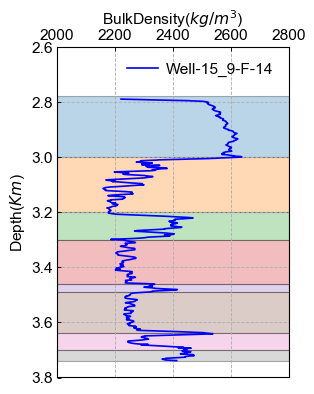

In [12]:
Block=[(2.78,3.0),(3.0,3.2),(3.2,3.3),(3.3,3.46),(3.46,3.49),(3.49,3.64),(3.64,3.7),(3.7,3.74)]

rho_c,DZ_c=smooth(rho[1:],DZ[1:],windows=80)


showTables([Block],XLables=['Block(km)'])

plotTables(X=[rho_c],Y=[DZ_c/1e3],
           XLable='BulkDensity($kg/m^3$)',YLabel='Depth($Km$)',DataNames=['Well-15_9-F-14'],
           Xlim=[2000,2800],Ylim=[2.6,3.8],
           RegionShade=[Block],
           InvertY=True,img_fname='img.png')

> ##### 3 (ii). Within each of these blocks, compute the average density and plot depth versus the blocked density for both the Barnett and GOM wells.
The average density for each block can be calculated as follows:  

In [13]:
#Average density for these blocks
rho_avg=rangeMean(rho,DZ/1e3,Block)

showTables(X=[Block],Y=[rho_avg],
           XLables=['Block_Barnett(km)'],
           YLabels=['Average Density($kg/m^3$)'])

,Block_Barnett(km),Average Density($kg/m^3$)
0,"(2.78, 3.0)",2565.705194
1,"(3.0, 3.2)",2240.725991
2,"(3.2, 3.3)",2355.387043
3,"(3.3, 3.46)",2244.391524
4,"(3.46, 3.49)",2317.567005
5,"(3.49, 3.64)",2276.087805
6,"(3.64, 3.7)",2339.470558
7,"(3.7, 3.74)",2426.927953


> ##### 3 (iii). Is there any value in blocking the continuous density profile this way? What could we possibly achieve in a MEM by using the blocked density profile instead of the continuous density profile?
As shown in 3(i), I used `moving average algorihtm` in `Pandas` library to find the 'True' trend line for density log which allows us to easily interperate and analyze the log by removing the spikes and noise in the data

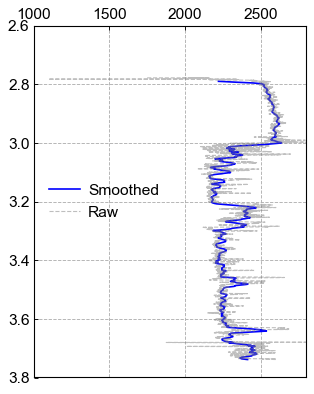

In [14]:
xx=smooth(rho[1:],DZ[1:]/1e3,windows=80,plot=True,xlim=[1000,2800],ylim=[2.6,3.8])